In [1]:
%matplotlib inline
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

# ICA

Die *Independent Component Analysis* berechnet im Gegensatz zur *Projection Pursuit* alle Dimensionen parallel. 
- Vorteil: robuster

## Unabhängigkeit

- Die Quellsignale $s_i$ sollen unabhängig sein

- Alle Quellsignale $s_i$ sollen dieselbe Wahrscheinlichkeitsverteilung $p_s(s)$ haben

- Innerhalb der Signale sollen die Einzelwerte unabhängig sein
    - (ungeordnet in t, keine versteckte Abhängigkeit)

## Gemeinsam  *Normal*-verteilte Variablen

### ... sind uninteressant für die ICA!

- Haben nur zweite Momente
    - keine höheren, wie Kurtosis ...
- Können maximal *ko*-variant sein
    - per *Whitening* reduzierbar

# Was ist unabhängig? 

#### Zufallsvariablen

#### Keine Struktur in der gemeinsamen Wahrscheinlichkeitsverteilungsdichte

#### Bedingte Verteilung = Randverteilung

$$p_{X}(X\!=\!x|Y\!=\!y_1) = p_{X}(X\!=\!x)$$

#### gemeinsame Wahrscheinlichkeitsdichte zerfällt in Produkt der einzelnen

$$p_{XY}(X\!=\!x, Y\!=\!y) = p_{X}(X\!=\!x) \cdot p_{Y}(Y\!=\!y) $$

#### *Alle* Momente zerfallen

$$\mathcal{E}(x^p\cdot y^q)=\int_{x=-\infty}^{\infty}\int_{y=-\infty}^{\infty}f_x(x)\cdot f_y(y)\cdot x^p\cdot y^q\:\mathrm{d}x\:\mathrm{d}y = \mathcal{E}(x^p)\cdot \mathcal{E}(y^q)$$

## Gegenbeispiel

### Zwei Sinuswellen unterschiedlicher Phase

In [3]:
'''two sine waves with different phases'''

In [4]:
'''example joint moments of two sine waves'''
Np = len(s1)
Sp = np.vstack((s1, s2)) # the tuples as Signal_phase
print('"expectation" values: m0 = {:.5f} and m1 = {:.5f}'
      .format(Sp[0].mean(), Sp[1].mean()))
Cp = np.cov(Sp) # the covariance matrix
print('"co/variances": \n{}'.format(Cp, ddof=0))
E22 = 1/Np * (Sp[0]**2*Sp[1]**2).sum() # the ^2 x ^2 moment
print('expectation(s0^2)={:.5f} x expectation(s0^2)={:.5f} gives {:.5f} \n \
               which is != expectation(s0^2*s1^2)          {:.5f}'
     .format(Cp[0,0], Cp[1,1], Cp[0,0]*Cp[1,1], E22))

"expectation" values: m0 = -0.00387 and m1 = -0.00551
"co/variances": 
[[ 0.51026683  0.28925483]
 [ 0.28925483  0.50675161]]
expectation(s0^2)=0.51027 x expectation(s0^2)=0.50675 gives 0.25858 
                which is != expectation(s0^2*s1^2)          0.21930


### Zwei Sinuswellen unterschiedlicher Frequenz

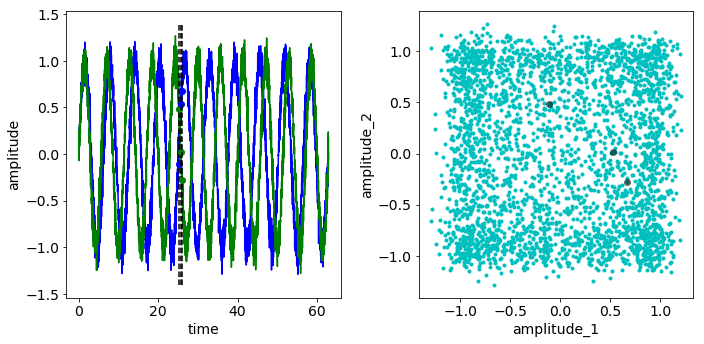

In [5]:
'''two sine waves with different frequency'''

In [6]:
'''example joint moments of two sine waves'''
Nf = len(s1)
Sf = np.vstack((s1, s2))  # the tuples as Signal_phase
print('"expectation" values: m0 = {:.5f} and m1 = {:.5f}'
      .format(Sp[0].mean(), Sp[1].mean()))
Cf = np.cov(Sf)  # the covariance matrix
print('"co/variances": \n{}'.format(Cf, ddof=0))
E22 = 1/Nf * (Sf[0]**2*Sf[1]**2).sum()          # the 2x2 moment
print('expectation(s0^2)={:.5f} x expectation(s0^2)={:.5f} gives {:.5f} \n \
               which is  = expectation(s0^2*s1^2)          {:.5f}'
     .format(Cf[0,0], Cf[1,1], Cf[0,0]*Cf[1,1], E22))

"expectation" values: m0 = -0.00387 and m1 = -0.00551
"co/variances": 
[[ 0.51069197 -0.00063153]
 [-0.00063153  0.50614915]]
expectation(s0^2)=0.51069 x expectation(s0^2)=0.50615 gives 0.25849 
                which is  = expectation(s0^2*s1^2)          0.25731


# Fragestellung ICA

#### Quellsignale $\mathbf{S}$

- unabhängig!
- unbekannt, gesucht

#### Mischungsmatrix $\mathbf{A}$

- unbekannt, gesucht

Mischungsmatrix $\mathbf{A}$ hat aus Quellsignalen $\mathbf{s}$ Mischungen erzeugt $\mathbf{s}\overset{A}{\rightarrow}\mathbf{x}$:
$$\mathbf{x}=\mathbf{As}$$

#### Mischsignale $\mathbf{x}$

- als einzige bekannt

#### Entmischungsmatrix $\mathbf{W}$

$$\mathbf{s} = \mathbf{W^* x}$$
- wäre $\mathbf{W^*}=\mathbf{A}^{-1}$ bekannt, ließen sich Quellsignale berechnen
- unbekannt, gesucht

## Mischung

Entstehung der Mischungen $\mathbf{x}$ aus den Quellen $\mathbf{s}$ :
$$\mathbf{x} = \mathbf{As}$$

Gesucht: Umkehrung
$$\mathbf{s} = \mathbf{W^{*}x}$$

Wahrscheinlichkeitsdichteverteilung von $\mathbf{s}$ ist
$$p_s(\mathbf{x})$$
daraus die der Mischungen
$$p_x(\mathbf{x})=p_s(\mathbf{s})\left|\frac{\partial\mathbf{s}}{\partial\mathbf{x}}\right|\\
\qquad\;=p_s(\mathbf{s})\left|\mathbf{W^{*}}\right|$$

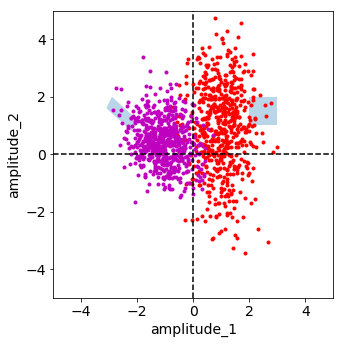

In [7]:
'''demonstrate transformation and change of volume'''
np.random.seed(98765)
fig = plt.figure(figsize=(5,5))
sss = np.array([stats.norm(1.0, 0.6).rvs(600), 
                stats.norm(1.0, 1.5).rvs(600)])  # random distribution
plt.plot(sss[0], sss[1], 'r.')                   # this distribtion in red
AAA = np.array([[-.9, -.2], [.8, -.4]])          # transformation matrix
xxx = np.dot(AAA, sss)                           # tranformed s to x
plt.plot(xxx[0], xxx[1], 'm.')                   # x in purple
plt.plot(2*[0], [-5, 5], 'k--')
plt.plot([-5, 5], 2*[0], 'k--')
plt.xlim( -5, 5)
plt.ylim( -5, 5)

from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
scorners = np.array([[2, 2], [2, 1], [3, 1], [3, 2]]) # sample region s
xcorners = np.dot(AAA, scorners.T).T   # transformed to region x
patches = []
ax = fig.gca()  # get current axes in order to attach polygons
polygon = Polygon(scorners, True)
patches.append(polygon)
polygon = Polygon(xcorners, True)
patches.append(polygon)
p = PatchCollection(patches, alpha=0.3)
ax.add_collection(p)
plt.xlabel('amplitude_1')
plt.ylabel('amplitude_2')
plt.tight_layout();

Für nicht-optimale Entmischungsmatrizen $\mathbf{W}$ ist die nicht-optimale Lösung $\mathbf{y}=\mathbf{Wx}$ und

$$p_x(\mathbf{x})=p_s(\mathbf{Wx})\left|\mathbf{W}\right|$$

[N.T.]
$$p_x(\mathbf{x})=p_s(\mathbf{Wx})\left|\mathbf{W}\right|$$

## Wenn unabhängig ...

## ... dann
Gesamtwahrscheinlichkeitsverteilung
$$p_s(\mathbf{s})=\prod_{t=1}^N\prod_{i=1}^Ip_s(s_i(t))$$

- p in Produkte zerlegen

----

- t: N Daten/Meßwerte, bei uns 44tausend Amplituden in der Zeit t
- i: I Stk. Variablen, Dimension des Problems, bei uns 2 Audiosignale

# Maximum Likelihood

$$p_x(\mathbf{x})=p_s(\mathbf{Wx})\left|\mathbf{W}\right| =: L(\mathbf{W})$$

Likelihoodfunktion $L$, die es zu maximieren gilt:

$$L(\mathbf{W}) = \prod_{i=1}^{M}p_s(\mathbf{w}_i^T\mathbf{x})\left|\mathbf{W}\right|$$ 
mit unabhängigen Quellsignalen
$$L(\mathbf{W}) = \prod_{i=1}^{M}\prod_{t=1}^{N}p_s(\mathbf{w}_i^T\mathbf{x}^t)\left|\mathbf{W}\right|$$ 

Log-Likelihood zerfällt in Summen

$$l(\mathbf{W}) := \ln L(\mathbf{W}) = \sum_{i=1}^{M}\sum_{t=1}^{N}\ln p_s(\mathbf{w}_i^T\mathbf{x}^t) + N \ln \left|\mathbf{W}\right|$$ 

[N.T.]

$$p_x(\mathbf{x})=p_s(\mathbf{Wx})\left|\mathbf{W}\right| =: L(\mathbf{W})$$

$W$ wird optimiert.


$$l(\mathbf{W}) := \ln L(\mathbf{W}) = \sum_{i=1}^{M}\sum_{t=1}^{N}\ln p_s(\mathbf{w}_i^T\mathbf{x}^t) + N \ln \left|\mathbf{W}\right|$$ 

> t ist die Zeitpunkt.

# Aufgabe
Maximiere $l$
$$f(\mathbf{W}, p_s, \mathbf{x})$$

# Lösung

## a) "Modell"-Verteilung

pdf $\;p_s$

[N.T.]

nicht unbedingte brauchen

## Wähle Verteilung $p_s$

### "*cdf-matching*"

Durch Anwenden erhält man eine *Gleich*verteilung
- maximale Unabhängigkeit
- minimale Komplexität
- maximale "*Entropie*"熵,

#### Beispiele

- Bilder mit hellen Flecken: schiefe Verteilung
- Sprachsignale: spitze Verteilungen

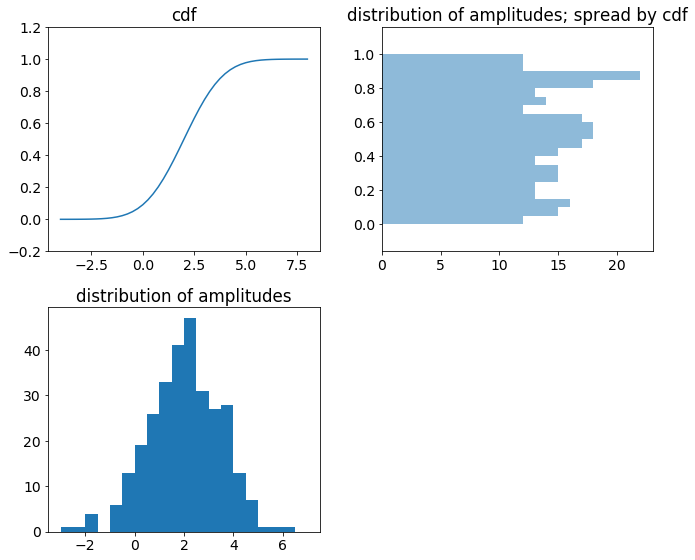

In [8]:
'''cdf matching visualization'''
np.random.seed(98765432)
mu, sigma = (2.0, 1.5)
gauss = stats.norm(mu, sigma)       # define a fixed distribution
xx = gauss.rvs(300)                 # draw 100 random variates
fig = plt.figure(figsize=(10, 8))
fig.add_subplot(2, 2, 3)
plt.hist(xx, bins=np.linspace(-3, 7, 20+1))
plt.title('distribution of amplitudes')
fig.add_subplot(2, 2, 1)
zz = np.linspace(-4, 8, 48+1)
plt.plot(zz, gauss.cdf(zz))
plt.title('cdf')
plt.ylim(-.2, 1.2)
yy = gauss.cdf(xx)                  # spread equally
fig.add_subplot(2, 2, 2)
plt.hist(yy, bins=np.linspace(-.1, 1.1, 24+1), alpha=.5, orientation="horizontal")
plt.title('distribution of amplitudes; spread by cdf')
plt.tight_layout();

## Beispiel

Spitze *super-Gaussian* Verteilung ist $\;p_s=1-\tanh^2(\mathbf{s})$.

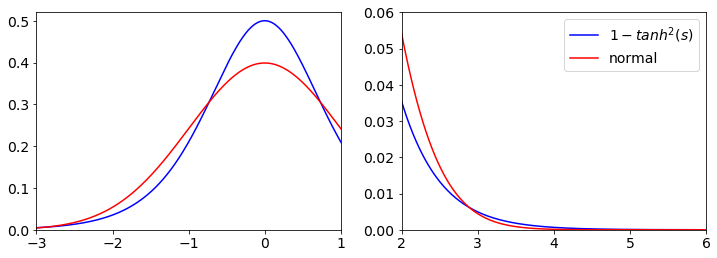

In [9]:
'''example tanh as super gaussian distribution'''
s = np.linspace(-10., 10., 2001)
p_t = 1-np.tanh(s)**2                 # the tanh distribution
p_t *= (s.shape[0]-1)/20./p_t.sum()   # normalize
p_n = stats.norm.pdf(s)               # the normal distribution
f=plt.figure(figsize=(12, 4))
f.add_subplot(1, 2, 1)
plt.axis((-3.0, 1.0, 0., 0.52))
plt.plot(s, p_t, 'b-')
plt.plot(s, p_n, 'r-')
f.add_subplot(1, 2, 2)
plt.axis((2.0, 6.0, 0., 0.06))        # gap and enlarge y axis
plt.plot(s, p_t, 'b-', label='$1-tanh^2(s)$')
plt.plot(s, p_n, 'r-', label='normal')
plt.legend(loc='upper right');

## b) maximieren
Finde Entmischungsmatrix $\mathbf{W}$, welche Log-Likelihood $l(\mathbf{W, x})$ unter gegebenen Daten $\mathbf{x}$ maximiert
- brute force
    - Siehe Bsp. zuvor
- Gradientenmethode

## Gradientenmethode

$$\frac{1}{N}\; l = \frac{1}{N}\sum_{i=1}^M\sum_{t=1}^N\ln p_s(w_i^T x^t) + \ln \left|\mathbf{W}\right|$$

Dazu benötigen wir die Gradientenmatrix mit den Einträgen

$$\frac{\partial l}{N\partial\mathbf{W}_{ij}}=\mathcal{E} \Bigl( \sum_{i=1}^M\frac{\partial\ln g'(y_i)}{\partial\mathbf{W}_{ij}} \Bigr) +\frac{\partial\ln\left|\mathbf{W}\right|}{\partial\mathbf{W}_{ij}}\tag{*}$$

#### cdf

$$g$$

#### pdf

$$p_s = g'$$

#### testweise Entmischung

$$\mathbf{y}_i = \mathbf{w}_i^T\mathbf{x}$$


[N.T.]

N ist Anzahl der 

M ist Anzahl der 



### *erster* Term

Kettenregel
$$\frac{\partial\ln g'(y_i)}{\partial\mathbf{W}_{ij}}=\frac{1}{g'(y_i)}\frac{\partial g'(y_i)}{\partial\mathbf{W}_{ij}}$$

$\mathbf{y}=\mathbf{Wx}$
$$\frac{\partial g'(y_i)}{\partial\mathbf{W}_{ij}} = \frac{\partial g'(y_i)}{\partial y_i}\frac{\partial y_i}{\partial\mathbf{W}_{ij}} = g''(y_i)\cdot x_j$$

#### $\Rightarrow$

$$\mathcal{E}\Bigl(\sum_{i=1}^M\frac{\partial\ln g'(y_i)}{\partial\mathbf{W}_{ij}}\Bigr) = \mathcal{E}\Bigl(\sum_{i=1}^M\frac{g''(y_i)}{g'(y_i)}x_j\Bigr)$$

### *zweiter* Term

Es gilt
$$\frac{\partial\ln\left|\mathbf{W}\right|}{\partial\mathbf{W}_{ij}} = (\mathbf{W}^T)^{-1}_{\quad ij}$$


### beide Terme eingesetzt in (*)

Mit Abkürzung $\Psi(y_i) := \frac{g''(y_i)}{g'(y_i)}$ dann:

$$\frac{\partial l}{N\partial \mathbf{W}_{ij}} = \mathcal{E} \Bigl( \sum_{i=1}^{M}\Psi(y_i) x_j \Bigr) + (\mathbf{W}^T)^{-1}_{\;\;ij}$$

#### Vektorschreibweise

Jakobi/Gradientenmatrix (Dimension $M\times M$)

$$\frac{1}{N} \nabla l = (\mathbf{W}^T)^{-1} + \mathcal{E}\Bigl( \Psi(\mathbf{y}^t) [x^t]^T \Bigr)$$

#### Erwartungwert 

$$\mathcal{E}\Bigl( \Psi(\mathbf{y}^t) [x^t]^T \Bigr) = \frac{1}{N}\sum_{t=1}^N \Psi(\mathbf{Wx^t})[x^t]^T$$

### Gradientenmethode

$$\begin{aligned}
\mathbf{W}_{neu} =&\mathbf{W}_{alt} + \eta\nabla l \\
=&\mathbf{W}_{alt} + \eta\left((\mathbf{W_{alt}}^T)^{-1} + \frac{1}{N}\sum_{t=1}^N \Psi(\mathbf{W_{alt}x^t})[x^t]^T \right)
\end{aligned}$$

mit passend gewählter Schrittweite $\eta$. 

[N.T.]

neue Entscheitzung

## Modellverteilung Beispiel
$$p_s=1-\tanh^2(\mathbf{s})$$

#### cdf

$$g(\mathbf{y}^t) = \tanh(\mathbf{y}^t)$$

$g'=1-\tanh^2$ und $g''=-2\tanh g'$

$$\Psi(\mathbf{Wx}^t) = \frac{g''}{g'} = -2\tanh(\mathbf{Wx}^t)$$

[N.T.]

g streich streich durch g streich

## Zusammenfassung b) Maximum

Passend gewählte Verteilungsfunktion

- *pattern matching*
- Rechen-Vereinfachung

Dann ist der Gradient bestimmbar aus

- Daten-Matrix $\mathbf{x}$
- (testweiser) Entmischungs-Matrix $\mathbf{W}$
    
Und das Optimum der Entmischungsmatrix $\mathbf{W}$ kann mit der Gradientenmethode schrittweise angenähert werden.

(Siehe hierzu `Informatik`)

# fast ICA

implemtiert eine Art *Newton Iteration*

Dekorrelieren des neuen angenäherten Unterraums in jedem Schritt

- Konvergiert quadratisch (oft kubisch)
    - im Vergleich zur Gradientenmethode (=linear)
- keine Schrittweitenanpassung nötig 
- Verteilungsfunktion $g$ unkritisch

#### Literatur:
Hyvarinen, Oja: Independent Component Analysis: Algorithms and Applications. Neural Networks, **13(4-5)**, 2000 (pp. 411-430)

Die Methode *fast*-ICA ist implementiert in <br>
http://scikit-learn.org/stable/auto_examples/decomposition/plot_ica_blind_source_separation.html

## *sklearn* Paket mit FastICA

**S**cipy tool**k**it for machine **learn**ing<br>
Open source, BSD license<br>
Erstveröffentlichung in 2010 <br>
Unterstützer: INRIA, Telecom ParisTec, Google<br>

#### Installation: ####
    conda install scikit-learn,
    apt-get install python-sklearn,
    pip install -U scikit-learn      oder
    
siehe http://scikit-learn.org/stable/install.html <br>

## `FastICA`

    from sklearn.decomposition import FastICA     # import 
    myica = FastICA(n_components=N)               # initialize
    myica.fit(X)                                  # call: fit the model to X       -or-
    Y = myica.fit_transform(X)                    # fit and recover the sources from X.

    Parameter 
    -----------
    X : array-like, shape (n_samples, n_features)
        Training data, where n_samples is the number of samples
        and n_features is the number of features.
    
    Returns
    -----------
    X_new : array-like, shape (n_samples, n_components)

[N.T.]

n_features: wie viele variable


In [10]:
from scipy.io import wavfile
freq, s1 = wavfile.read("data/wav_independent.wav")
freq, s2 = wavfile.read("data/wav_component.wav")
l = min(s1.shape[0], s2.shape[0])  # cut for same length
s1=s1[:l]
s2=s2[:l]
S=np.array([s1, s2])
print('Source data S.shape  = ',S.shape)
A11=0.4
A12=0.9
A21=0.7
A22=0.5
A = np.array([[0.4, 0.9], [0.7, 0.5]])  # mixing matrix
X = np.dot(A, S)                        # data mixture
print('Micture data X.shape = ', X.shape)

Source data S.shape  =  (2, 47628)
Micture data X.shape =  (2, 47628)


In [11]:
from sklearn.decomposition import FastICA
myica = FastICA(n_components=2)
y = myica.fit_transform(X.T).T
W = myica.components_
print('the unmixing matrix is supposed to be:\n {}'.format(W))
print('the backtransformed data y has shape {}'.format(y.shape))

the unmixing matrix is supposed to be:
 [[  4.71153096e-06  -2.71781070e-06]
 [  4.02516456e-06  -7.13780450e-06]]
the backtransformed data y has shape (2, 47628)


[N.T.]

etwa gleich gewicht

### Optionale Argumente zu FastICA:

    fun: (optional)  string or function (value, derivative). Default: 'logcosh'
    
        def my_g(x):
            return x**3, 3*x**2 

    whiten: (optional)   boolean

[N.T.]

gleich



### FastICA-Ergebnisse 

#### Parameter

    components_ : array, shape (n_components, n_features)    The unmixing matrix.
    mixing_ :     array, shape (n_features, n_components)    The mixing matrix.

#### Funktionen

    transform(X, y=None, copy=True)     
        Recover the sources from X (apply the unmixing matrix).
        X :     array-like, shape(n_samples, n_features)     Input Data to transform
        copy :  bool (optional)  
        X_new : array-like, shape (n_samples, n_components)  Return value found sources

#### Liste der Möglichkeiten per Autovervollständigung
    ica.<TAB>

#### Hilfe
    ica.mixing_?

## c) Ergebnis

$\mathbf{W}$ enthält Entmischungsvektoren $\mathbf{w}_i$
$$\mathbf{W}=\left(\mathbf{w}_1,\mathbf{w}_2,\dots\right)^T$$ 

Ergebnis:
$$\mathbf{y}=\mathbf{Wx} = \mathbf{s}$$

shape(y)= (47628, 2)


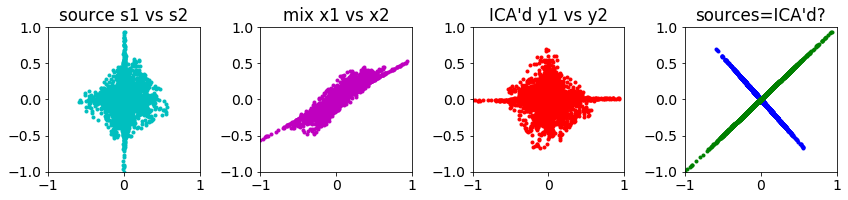

In [12]:
'''compare sources, mixtures and ICA demixing result'''
print('shape(y)=',y.T.shape)
s1 = (S/abs(S).max())[0, :]    # source data
s2 = (S/abs(S).max())[1, :] 
x1 = (X/abs(X).max())[0, :]    # mixture data
x2 = (X/abs(X).max())[1, :]
y1 = (y/abs(y).max())[0, :]    # decomposed with ICA 
y2 = (y/abs(y).max())[1, :]
fig=plt.figure(figsize=(12, 3))
titles = ('source s1 vs s2', 'mix x1 vs x2', 'ICA\'d y1 vs y2')
colors = ('c.', 'm.', 'r.')
data1 = (s1, x1, y1)
data2 = (s2, x2, y2)
for i, t, c, d1, d2 in zip(range(1, 4), titles, colors, data1, data2):
    fig.add_subplot(1, 4, i)
    plt.axis(( -1., 1., -1., 1.))
    plt.title(t)
    plt.plot(d1, d2, c)
fig.add_subplot(1, 4, 4)
plt.title("sources=ICA'd?")
plt.plot(s1, y2, 'b.')
plt.plot(s2, y1, 'g.')
plt.axis(( -1., 1., -1., 1.));
plt.tight_layout();

## d) Problem-Anpassung

- Bei komplexen Signalen spielt es durchaus eine wichtige Rolle, welche Verteilung $p_s$ man annimmt
- Man kann $p_s$ aus Trainings-Daten punktuell schätzen
    - zB. durch die mittlere Entfernung der nächsten Nachbarn

## e) Verteilung

### Randverteilung der Mischsignale

In [13]:
'''cummulative distribution function: tanh'''
def cdf(x):
    return np.tanh(x)

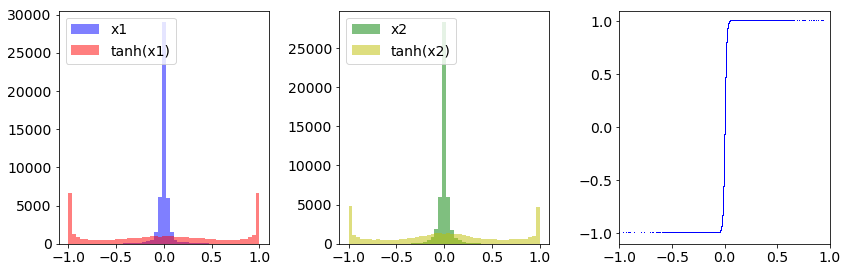

In [14]:
'''marginal distributions of the two mixtures - and their cdf'''
x1_cdf = cdf(60.0*x1)
x2_cdf = cdf(40.0*x2)
bins = np.linspace(-1, 1, 50)

f = plt.figure(figsize=(12, 4))
f.add_subplot(1, 3, 1)
plt.hist(x1, bins, color='b', alpha=0.5, label='x1')
plt.hist(x1_cdf, bins, color='r', alpha=0.5, label='tanh(x1)')
plt.legend(loc='upper left');

f.add_subplot(1, 3, 2)
plt.hist(x2, bins, color='g', alpha=0.5, label='x2')
plt.hist(x2_cdf, bins, color='y', alpha=0.5, label='tanh(x2)')
plt.legend(loc='upper left')

f.add_subplot(1, 3, 3)
plt.xlim(-1., 1.)
plt.plot(x1, x1_cdf, 'b,')
plt.tight_layout();

### Verbundwahrscheinlichkeitsverteilung der Mischungen

joint probability density function

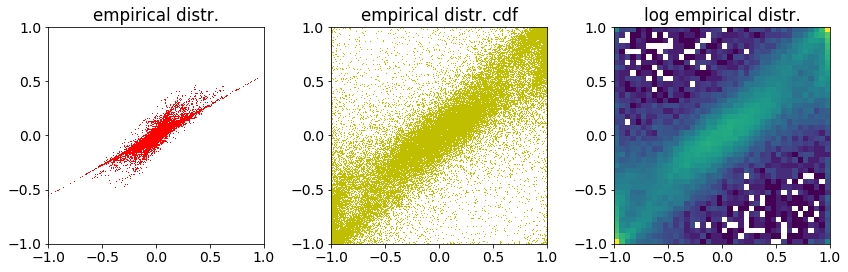

In [15]:
'''joint probability density = two dimensional distribution'''
f = plt.figure(figsize=(12, 4))
f.add_subplot(1, 3, 1)
plt.xlim(-1., 1.)
plt.ylim(-1., 1.)
plt.plot(x1, x2, 'r,')
plt.title('empirical distr.')
f.add_subplot(1, 3, 2)
plt.xlim(-1., 1.)
plt.ylim(-1., 1.)
plt.title('empirical distr. cdf')
plt.plot(x1_cdf, x2_cdf, 'y,');
f.add_subplot(1, 3, 3)
plt.title('log empirical distr.')
from matplotlib.colors import LogNorm
counts, xbins, ybins, image = plt.hist2d(x1_cdf, x2_cdf, bins=(40, 40), norm=LogNorm())
plt.tight_layout();

## Quellsignale

Zum Vergleich die Randverteilung der Quellsignale

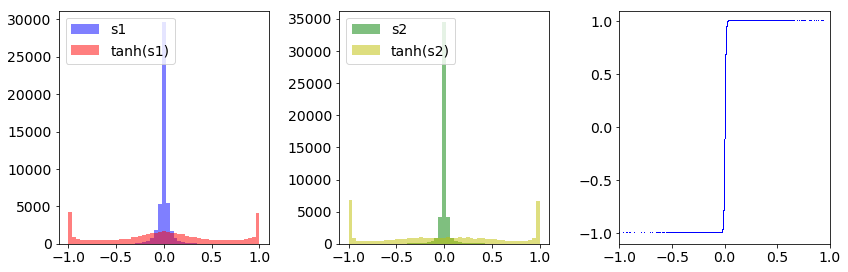

In [16]:
'''marginal distributions of source signals'''
s1_cdf = cdf(36*s1)
s2_cdf = cdf(100*s2)
bins = np.linspace(-1, 1, 50)

f = plt.figure(figsize=(12, 4))
f.add_subplot(1, 3, 1)
plt.hist(s1, bins, color='b', alpha=0.5, label='s1')
plt.hist(s1_cdf, bins, color='r', alpha=0.5, label='tanh(s1)')
plt.legend(loc='upper left');

f.add_subplot(1, 3, 2)
plt.hist(s2, bins, color='g', alpha=0.5, label='s2')
plt.hist(s2_cdf, bins, color='y', alpha=0.5, label='tanh(s2)')
plt.legend(loc='upper left')

f.add_subplot(1, 3, 3)
plt.xlim(-1., 1.)
plt.plot(s2, s2_cdf,'b,')
plt.tight_layout();

### Verbundwahrscheinlichkeitsverteilung der Quellsignale

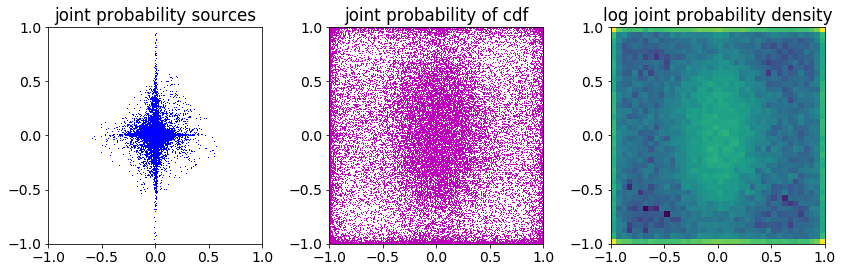

In [17]:
'''joint distribution of sources'''
f = plt.figure(figsize=(12, 4))
f.add_subplot(1, 3, 1)
plt.xlim(-1., 1.)
plt.ylim(-1., 1.)
plt.plot(s1, s2,'b,')
plt.title('joint probability sources')
f.add_subplot(1, 3, 2)
plt.xlim(-1., 1.)
plt.ylim(-1., 1.)
plt.title('joint probability of cdf')
plt.plot(s1_cdf, s2_cdf,'m,');
f.add_subplot(1, 3, 3)
plt.title('log joint probability density')
#plt.plot(s1, s2, 'k,', alpha=0.5);
counts, xbins, ybins, image = plt.hist2d(s1_cdf, s2_cdf, bins=(40, 40), norm=LogNorm())
plt.tight_layout();

# Zusammenfassung ICA

- ICA findet *unabhängige* Signale $\mathbf{s}$ in Daten $\mathbf{x}$, die durch $\mathbf{A}$ linear gemischt wurden:
$$\mathbf{x} = \mathbf{A}\mathbf{s}$$
- erlaubt die Zerlegung in *unabhängige* Quellsignale
$$\mathbf{y} = \mathbf{W^{*}}\mathbf{x}$$
- (maximiert die Entropie)
- Modellverteilung der Quellsignale *cdf-matching*
    - funktioniert auch mit ähnlichen Verteilungen
    - Beispiel *high curtotic* $\;\mathrm{cdf} = \tanh(x)$
- Entmischungsmatrix zB. per Gradientenmethode
- Zeitlicher Verlauf in den Daten (Sortierung) spielt keine Rolle
- *blind source separation*
    - keine Einschränkung der Daten
    - keine Modellvorgabe - außer *cdf-matching*
        > muss parameter finden
    - kann aus Trainings-Daten gelernt werden

## Einschränkungen

- ICA hat größeren Rechenaufwand als PCA, ...
    - Vor allem bei hohen Dimensionen
- Signale dürfen nicht *normalverteilt* sein
    - keinerlei auswertbare Information nach Dekorrelation (PCA)
- Entmischungsmatrix muß invertierbar sein $N\times N$
    - Ausweg: Pseudo-Inverse
    - Ausweg: Dimensionsreduzierung durch Vorbehandlung per PCA
- Skalierung und Vorzeichen der Quellsignale bleiben unbestimmt

# Zeitliche und räumliche ICA

### tICA

- $M$ gemischte Signale $\mathbf{x}_i$ der Länge $N$. 
    - $\mathbf{x}_i(t)$  Filmbilder mit $i$=Pixel-Nummer

### sICA

- Bildersammlung $\mathbf{x}^T$

### stICA

- Kombiniert sICA und tICA

# Anwendungs-Beispiele


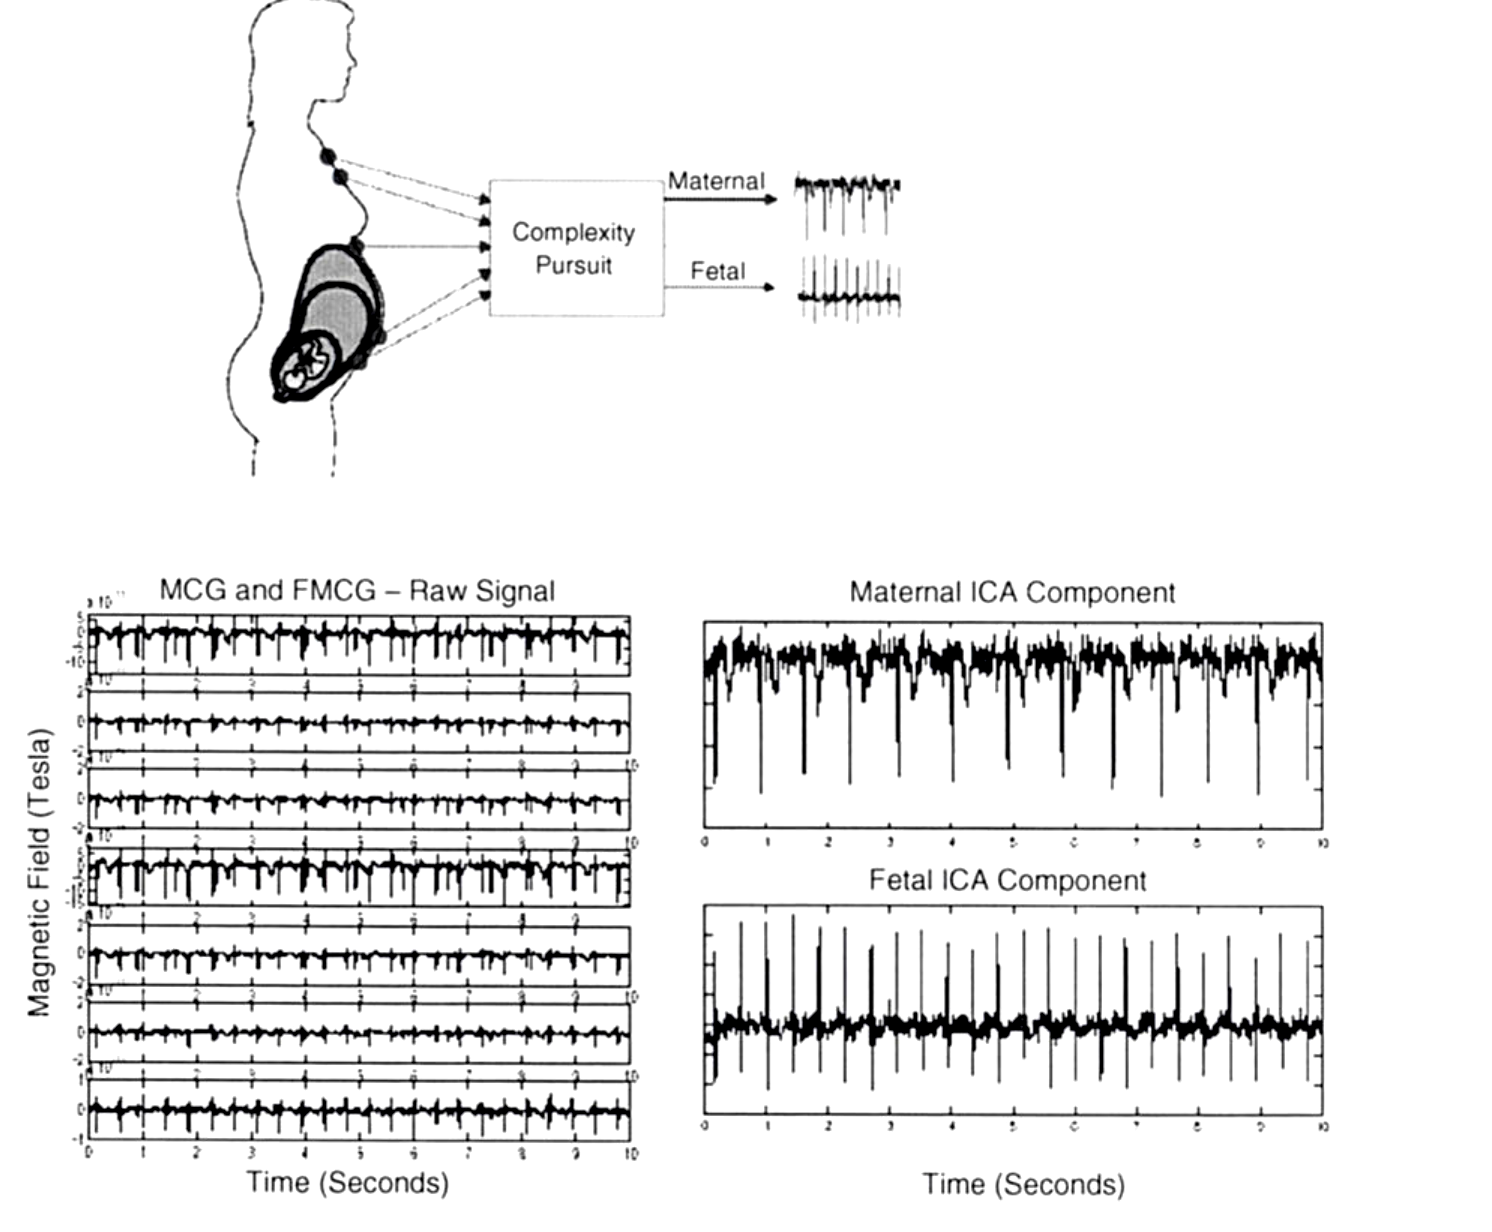

In [1]:
'''Magnetcardiographie MCG
   Aus: Stone; Independent Component Analysis; MIT press 2004'''

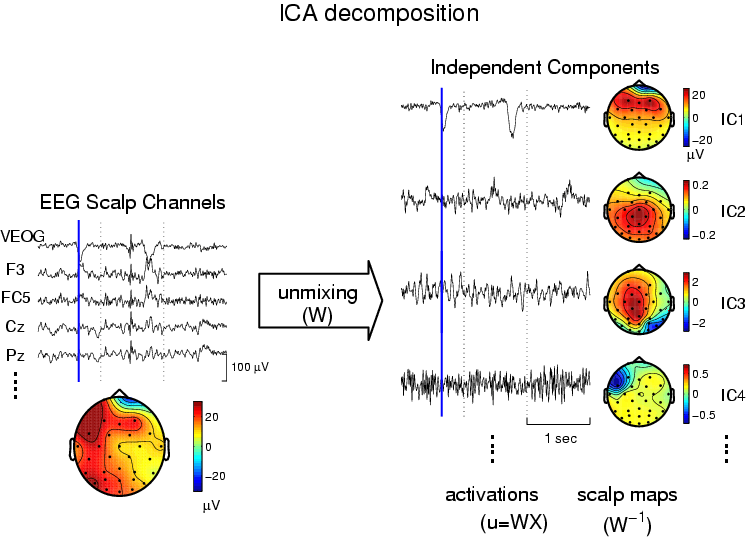

In [2]:
'''EEG Daten roh und *independent components*'''

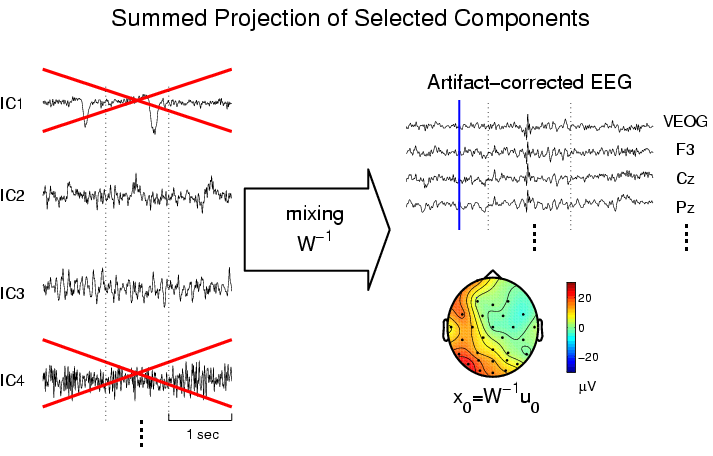

In [3]:
'''Ausschneiden von Blinzelartefakten und Rauschen'''

In [4]:
'''Zeitlicher Verlauf der Komponenten
   Ergebnis EEG
   Quelle: Tzyy-Ping Jung & Scott Makeig auf 
   https://sccn.ucsd.edu/~jung/Site/EEG_artifact_removal.html''''

##  funktionelle Magnetresonanztomographie (*fMRT*, *fmri*)

Hochaufloesender Vorabscan aus drei Komponenten 

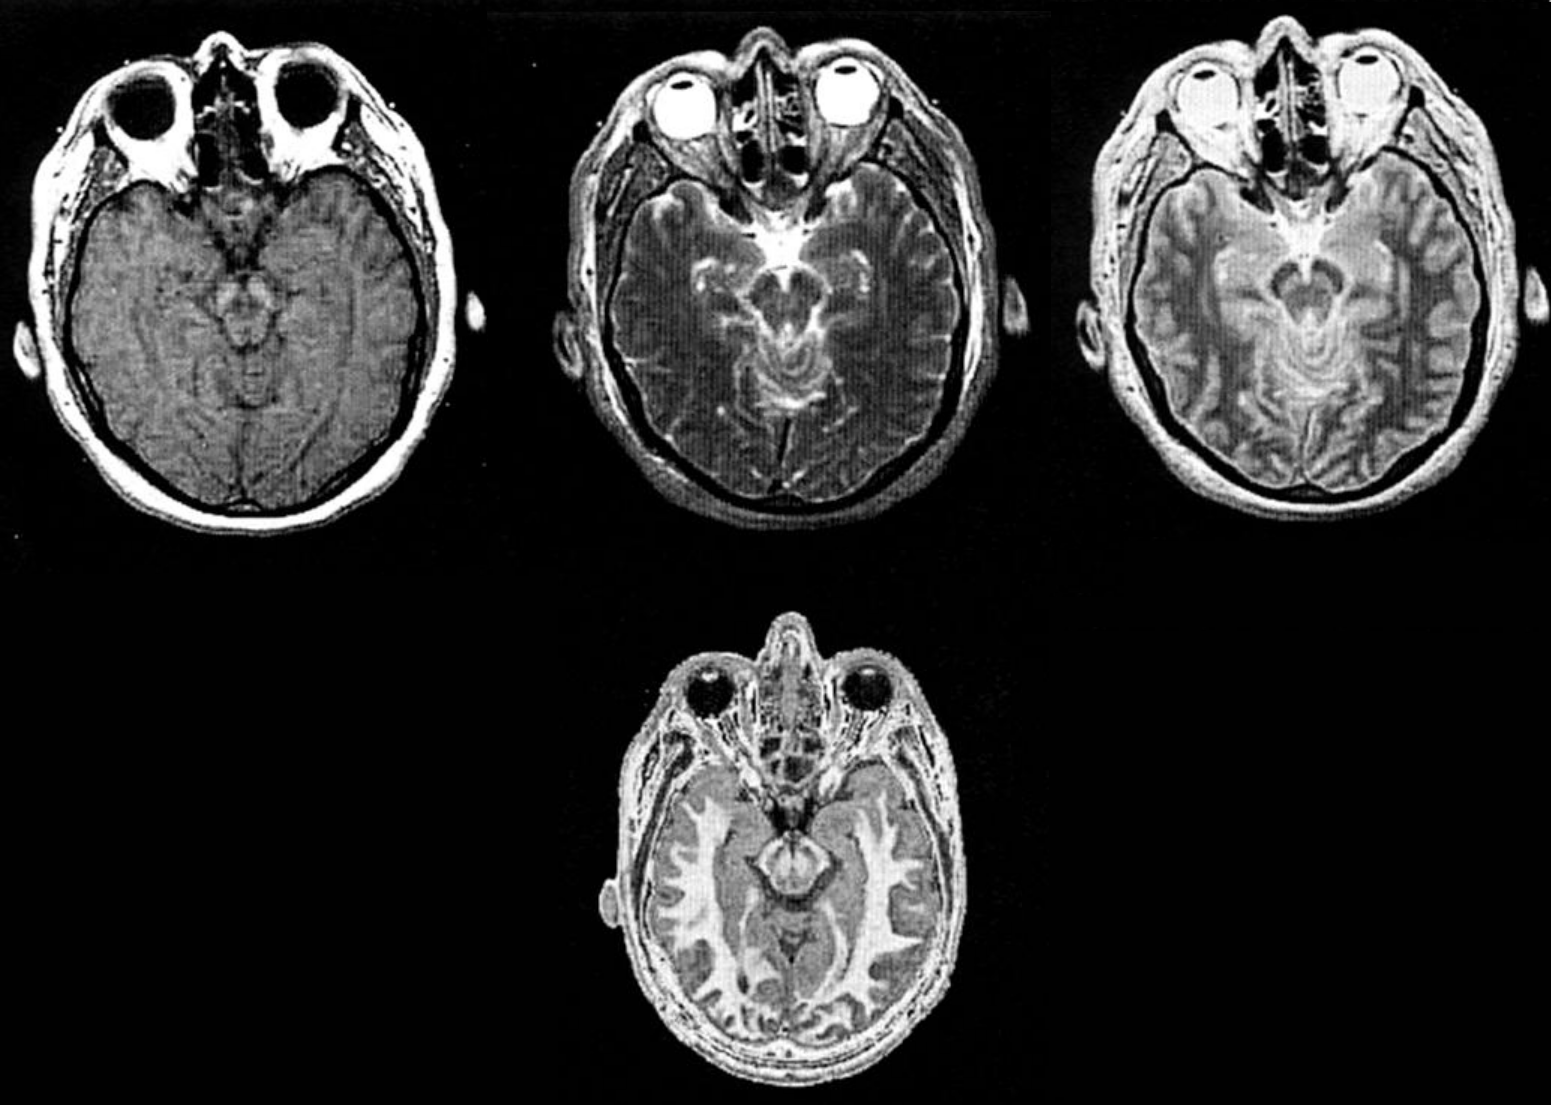

In [5]:
'''Vorabscans
   Aus: Stone; Independent Component Analysis; MIT press 2004'''

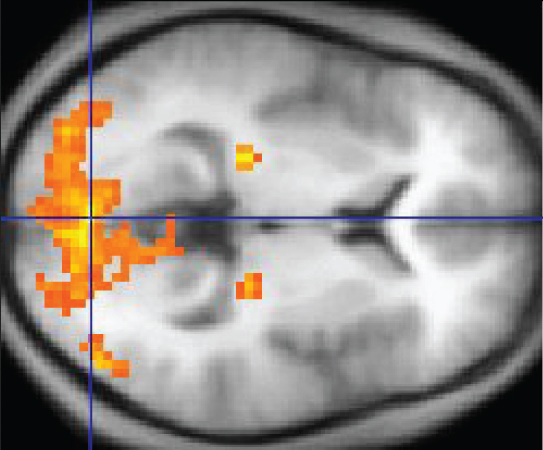

In [6]:
'''funktional
   Aus: Wikipedia; Uploaded by CFCF, CC BY 3.0'''

## Gesichtserkennung


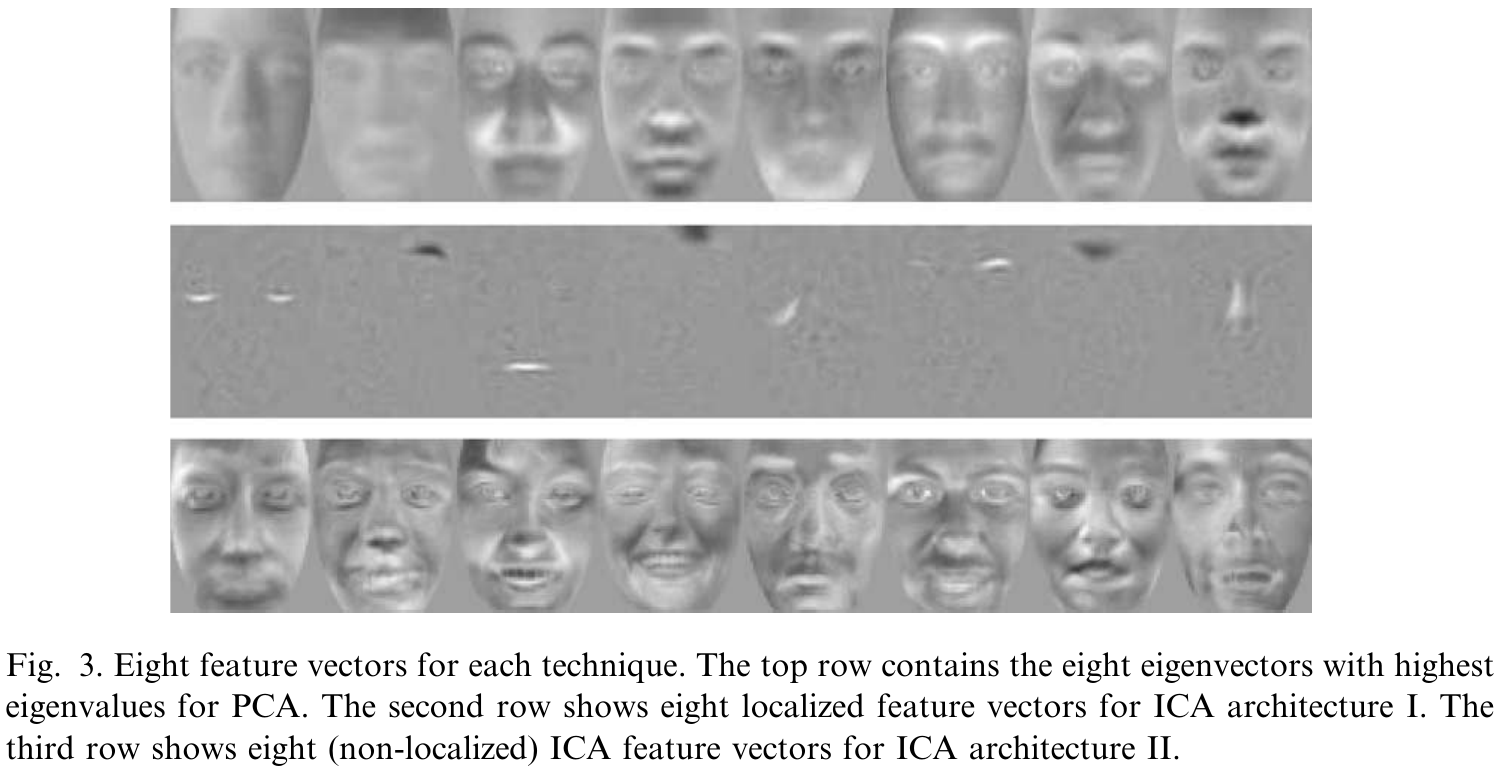

In [8]:
'''Gesichtserkennung II
   Aus: Draper, Baek, Bartlett, Beveridgea; Recognizing Faces with PCA and ICA; 2003'''

## Natural image features


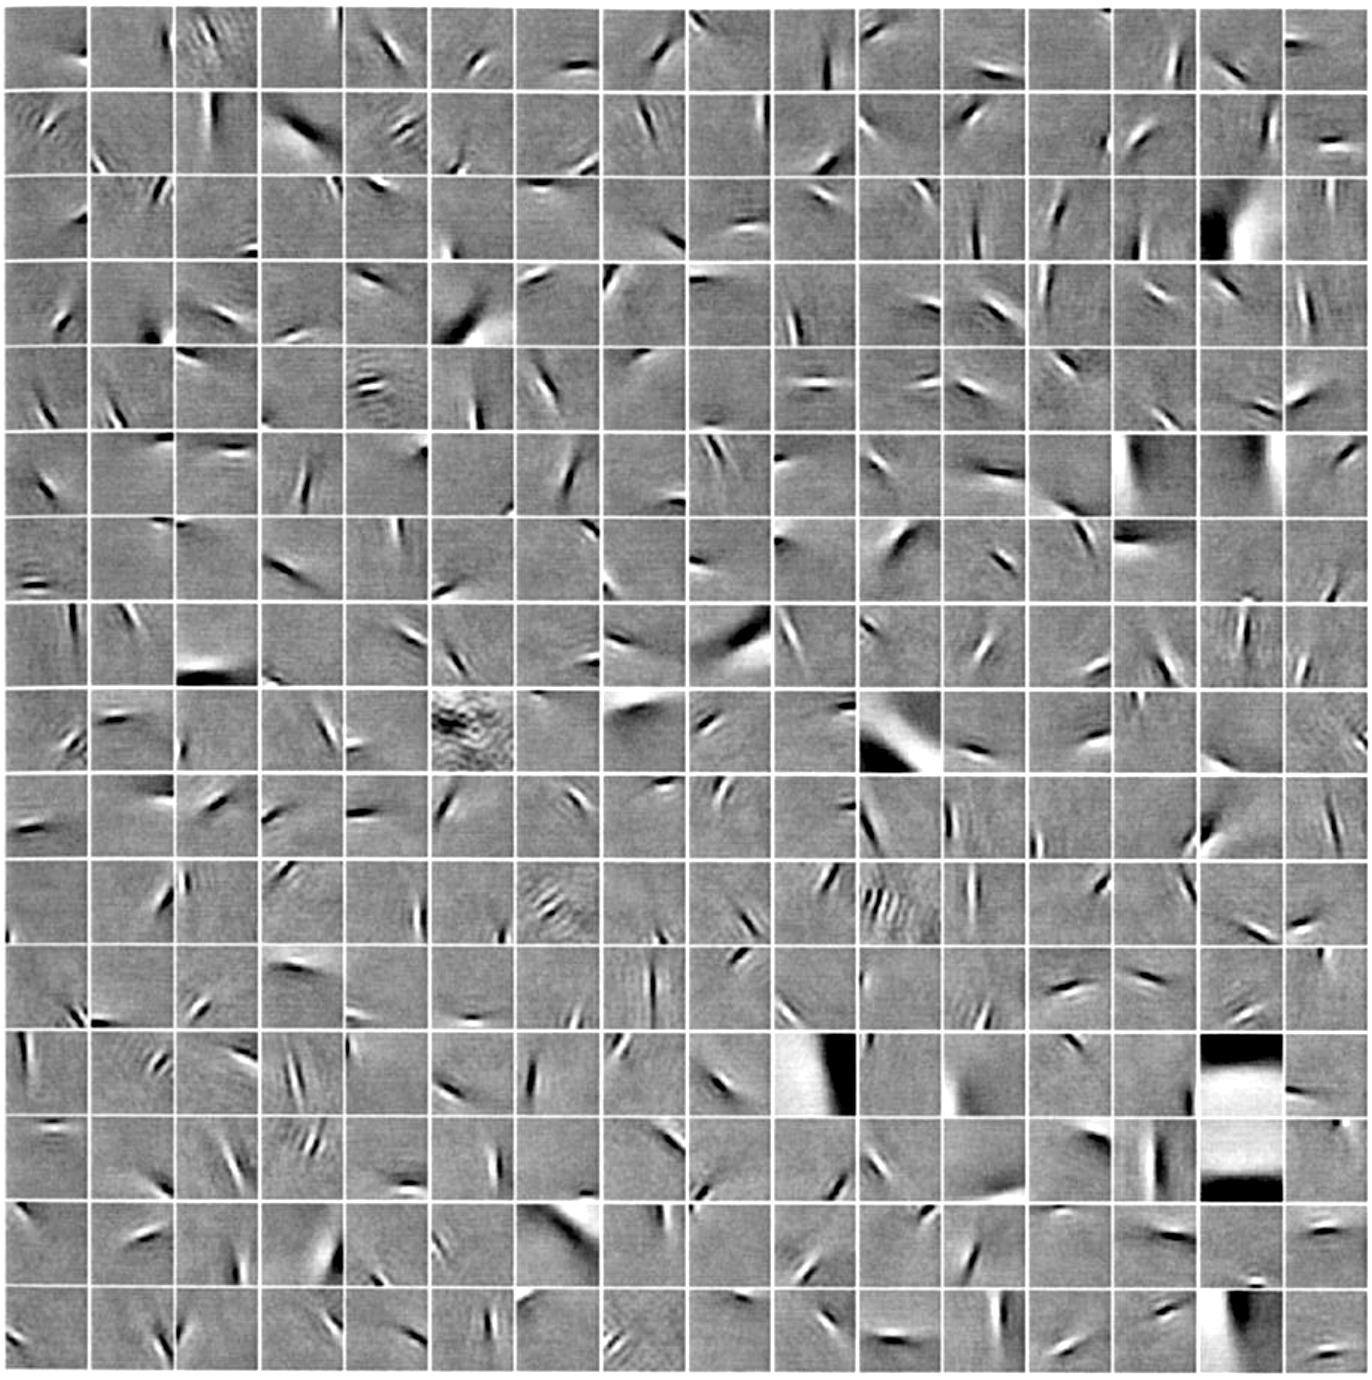

In [10]:
'''Natural Image Features
   Aus: Hyvärinen, Hurri, Hoyer; Natural Image Statistics; Springer 2009'''

# Literatur

Hyvärinen, Oja: Independent Component Analysis: Algorithms and Applications. Neural Networks, **13(4-5)** 411-430 2000<br>
Stone: Independent Component Analysis, MIT press 2004 <br>
Hyvärinen, Hurri, Hoyer: Natural Image Statistics, Springer 2009 <br>
http://www.cs.helsinki.fi/u/ahyvarin/papers/fastica.shtml<br>


# Fragen?